In [14]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False

In [15]:
tre_market_share = 0.164
swedish_population = 10e6
urban_stockholm_population = 1e6
total_bandwidth = 139.6e6
lost_bandwidth = 10e6
lost_bandwidth_percent = lost_bandwidth/total_bandwidth

In [198]:
#urban area (stockholm)
pop_per_km_sthlm = 5000
#bytes_per_year = 3000000e12 * tre_market_share
bytes_per_year = 686_814.887e12
bytes_per_year_2023 = 806_814.887e12
average_kbit_sec_busyhour = bytes_per_year_2023 * 8 / (365 * 8 * 60 * 60 * 1000)
average_kbit_sec_busyhour_per_person = average_kbit_sec_busyhour / swedish_population
kbit_sqrkm_sthlm = pop_per_km_sthlm * average_kbit_sec_busyhour_per_person

In [199]:
#rural area
pop_per_km_rural = 20
kbit_sqrkm_rural = pop_per_km_rural * average_kbit_sec_busyhour_per_person

<BarContainer object of 1 artists>

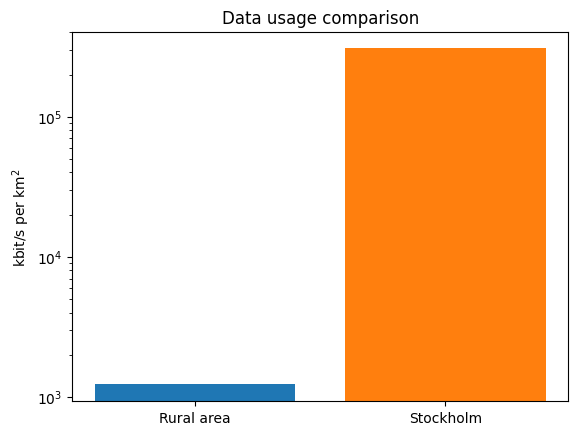

In [200]:
#plot
plt.title('Data usage comparison')
plt.yscale('log')
plt.ylabel(r'kbit/s per km$^2$')
plt.xticks(np.arange(2), ["Rural area", "Stockholm"])
plt.bar(0, kbit_sqrkm_rural, label='Rural area')
plt.bar(1, kbit_sqrkm_sthlm, label='Stockholm')

Text(0, 0.5, 'Data (Tbyte)')

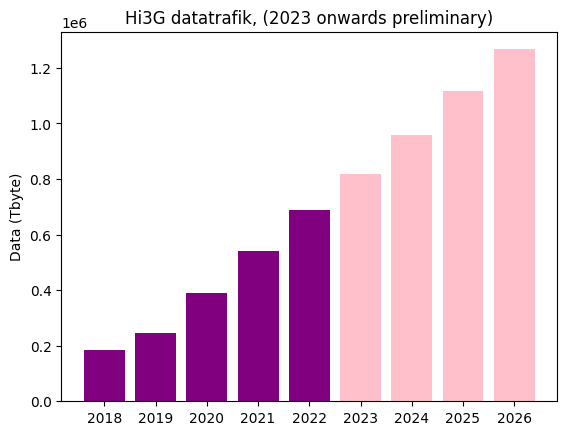

In [210]:
#data TRE 
#https://statistik.pts.se/VariableValue/VariableValuesResult/2294?tableName=Tabell%2015%20Mobila%20datatj%C3%A4nster&&subHeader=Mobila%20samtals-%20och%20datatj%C3%A4nster%20-%20mobila%20datatj%C3%A4nster%20[8][10]*
data_usage3 = [1266_814.987,1116_814.987, 956_814.887,816_814.887,686_814.887, 541_691.417, 389_994.516, 245_134.305, 185_363.234]
plt.xticks(np.arange(9), ["2018", "2019","2020", "2021", "2022", "2023", "2024", "2025", "2026"])
for i in range(0, len(data_usage3)):
    if i < 5:
            plt.bar(i, data_usage3[-i-1], color='purple')
    else:
            plt.bar(i, data_usage3[-i-1], color='pink')
plt.title('Hi3G datatrafik, (2023 onwards preliminary)')
plt.ylabel('Data (Tbyte)')

In [202]:
#spectral efficiency
#https://www.gsma.com/spectrum/wp-content/uploads/2019/06/Benefits-of-Technology-Neutral-Spectrum-Licences.pdf
efficiency3g = 0.8
efficiency4g = 1.9
efficiency5g = 2.84
efficiency3g_4g_mix = (efficiency3g * 0.5) + (efficiency4g * 0.5)
efficiency4g_5g_mix = (efficiency4g * 0.5) + (efficiency5g * 0.5)

In [177]:
#----------Can moving from 3G to 4G/5G be sufficient in some cases? 
eight_hundred_band_percentage = 20e6/total_bandwidth
nine_hundred_band_percentage = 10e6/total_bandwidth
two_gig1_band_percentage = (19.8 * 2e6)/total_bandwidth
two_gig6_band_percentage = 70e6/total_bandwidth

<BarContainer object of 1 artists>

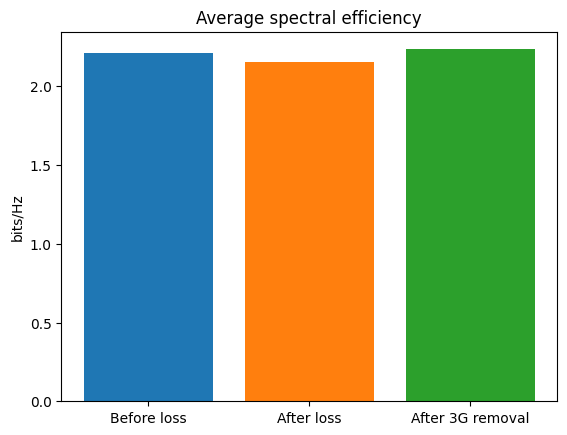

In [178]:
#-------------Plot capacity
total_spectral_eff_before = ((eight_hundred_band_percentage * efficiency3g_4g_mix) + 
                             (nine_hundred_band_percentage * efficiency3g) +
                            (two_gig1_band_percentage * efficiency4g) +
                            (two_gig6_band_percentage * efficiency5g))
total_spectral_eff_after_loss = ((eight_hundred_band_percentage * efficiency3g_4g_mix) + 
                            (two_gig1_band_percentage * efficiency4g) +
                            (two_gig6_band_percentage * efficiency5g))
total_spectral_eff_after_upgrade = ((eight_hundred_band_percentage * efficiency4g) + 
                            (two_gig1_band_percentage * efficiency4g) +
                            (two_gig6_band_percentage * efficiency5g))
#plot
plt.title('Average spectral efficiency')
#plt.yscale('log')
plt.ylabel('bits/Hz')
plt.xticks(np.arange(3), ["Before loss", "After loss", "After 3G removal"])
plt.bar(0, total_spectral_eff_before, label='Rural area')
plt.bar(1, total_spectral_eff_after_loss, label='Stockholm')
plt.bar(2, total_spectral_eff_after_upgrade, label='Stockholm')

<BarContainer object of 1 artists>

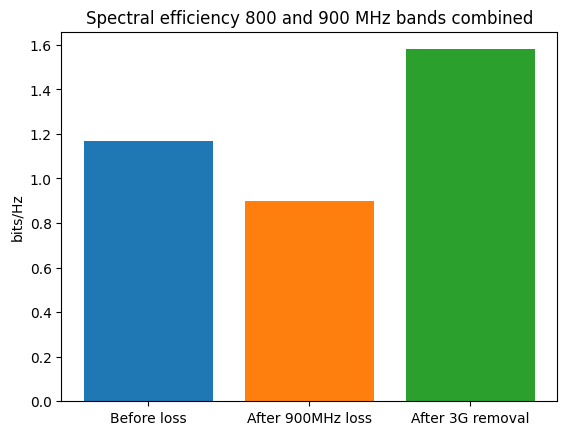

In [211]:
#only 800 and 900 comparison
eight_hundred_band_percentage2 = 20/30
nine_hundred_band_percentage2 = 10/30
#-------------Plot capacity
total_spectral_eff_before2 = (((eight_hundred_band_percentage2 * efficiency3g_4g_mix) + 
                             nine_hundred_band_percentage2 * efficiency3g))
                            
total_spectral_eff_after_loss2 = ((eight_hundred_band_percentage2 * efficiency3g_4g_mix)) 
                            
total_spectral_eff_after_upgrade2 = ((eight_hundred_band_percentage2 * efficiency4g_5g_mix))
                            
#plot
plt.title('Spectral efficiency 800 and 900 MHz bands combined')
#plt.yscale('log')
plt.ylabel('bits/Hz')
plt.xticks(np.arange(3), ["Before loss", "After 900MHz loss", "After 3G removal"])
plt.bar(0, total_spectral_eff_before2)
plt.bar(1, total_spectral_eff_after_loss2)
plt.bar(2, total_spectral_eff_after_upgrade2)

In [179]:
#-------------Mastplatser
#https://www.pts.se/globalassets/startpage/dokument/icke-legala-dokument/rapporter/2016/radio/mobiltackning-2015.pdf
# sid 17
tre_base_stations = tre_market_share * 43068

In [180]:
#system capacity
sweden_capacity_before_loss = (total_bandwidth/1e6) * efficiency3g_4g_mix * 21
sweden_capacity_after_loss = ((total_bandwidth-10e6)/1e6) * efficiency3g_4g_mix * 21
print(sweden_capacity_before_loss)
print(sweden_capacity_after_loss)
#plt.bar(1, sweden_capacity_before_loss)
#plt.bar(2, sweden_capacity_after_loss)

3957.6600000000003
3674.1600000000003


In [197]:
#network capacity STHLM
sthlm_area = 381 #km2
base_stations_sthlm = tre_base_stations * 0.1 #population 1million
network_capacity_sthlm = ((total_bandwidth - 10e6)/1e6 * efficiency4g_5g_mix * (base_stations_sthlm) *
                          1 / sthlm_area)
print('Network capacity STHLM (Mb/s)', network_capacity_sthlm)
print('User demand STHLM', kbit_sqrkm_sthlm/1000)

Network capacity STHLM (Mb/s) 569.4124050141733
User demand STHLM 482.0452385844749


In [182]:
def okomura_hata(h_t, h_r, d, f, city_type = 'medium'):
    #COST 231
    if(f > 1500):
        loss = 46.3 + 33.9 * np.log10(f) - 13.82 * np.log10(h_t) + (44.9 - 6.55 * np.log10(h_t)) * np.log10(d)
        if(city_type == 'large'):
            loss = loss + 3
    else:
        loss = 69.55 + 26 * np.log10(f) - 13.82 * np.log10(h_t) + (44.9 - 6.55 * np.log10(h_t)) * np.log10(d)

    match city_type:
        case 'medium':
            A = (1.1 * np.log10(f) - 0.7) * h_r - (1.56 * np.log10(f) - 0.8)
            return loss - A
        case 'large':
            if(f < 300):
                A = 8.29 * (np.log10(1.54 * h_r))**2 - 1.1
                return loss - A
            else:
                A = 3.2 * (np.log10(11.75 * h_r))**2 - 4.97
                return loss - A
        case 'suburban':
            #A equals medium city here
            A = (1.1 * np.log10(f) - 0.7) * h_r - (1.56 * np.log10(f) - 0.8)
            return (loss - A) - 2 * (np.log10(f/28))**2 - 5.4
        case 'rural':
            #A equals medium city here
            A = (1.1 * np.log10(f) - 0.7) * h_r - (1.56 * np.log10(f) - 0.8)
            return (loss - A) - 4.78 * (np.log10(f))**2 - 18.733 * np.log10(f) - 40.98
        case _:
            return "no valid city"


Text(0, 0.5, 'Received power (dBm)')

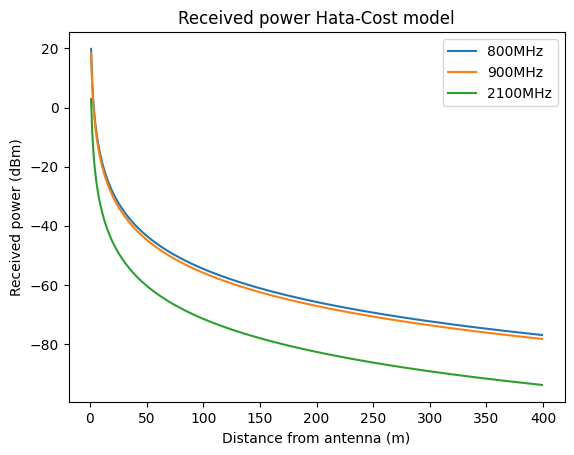

In [164]:
#coverage 900MHz
received_signal_list800 = []
received_signal_list900 = []
received_signal_list2100 = []
max_signal_strength = 37 
#https://www.pts.se/contentassets/2a002b99e7574e1cbf9b57a3cf9667d3/10-10534-bilaga-a-till-beslut-800mhz.pdf
kilometers = 400

for i in range(1, kilometers, 1):
    received_signal_list800.append(67 - okomura_hata(15, 1.5, i*0.001, 800, 'large')-30)
    received_signal_list900.append(67 - okomura_hata(15, 1.5, i*0.001, 900, 'large')-30)
    received_signal_list2100.append(67 - okomura_hata(15, 1.5, i*0.001, 2100, 'large')-30)
    
plt.plot(range(1, kilometers), received_signal_list800, label='800MHz')
plt.plot(range(1, kilometers), received_signal_list900, label='900MHz')
plt.plot(range(1, kilometers), received_signal_list2100, label='2100MHz')
plt.legend()
plt.title('Received power Hata-Cost model')
plt.xlabel('Distance from antenna (m)')
plt.ylabel('Received power (dBm)')
#plt.xscale('log')